In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

from beamprop_pkg.beamprop.grids import Grid2D
from beamprop_pkg.beamprop.absorbers import supergaussian_mask_2d, absorbing_field_1d

In [3]:
g = Grid2D(x_span=1.024e-3, z_span=3e-3, nx=512, nz=300)
X, Z, dx, dz = g.mesh()
M = supergaussian_mask_2d(X, Z, g.x_span, g.z_span, width_frac=0.30, order=6)

In [4]:
import numpy as np

test1 = np.array(range(5))
test2 = np.array(range(5, 10))

np.concatenate([test1, test2])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
Nx = 1024
w = 50
test = absorbing_field_1d(Nx, w, 0)
print(len(test))

[-50 -49 -48 -47 -46]
[-4 -3 -2 -1  0]
[1023 1022 1021 1020 1019]
[977 976 975 974 973]
1024


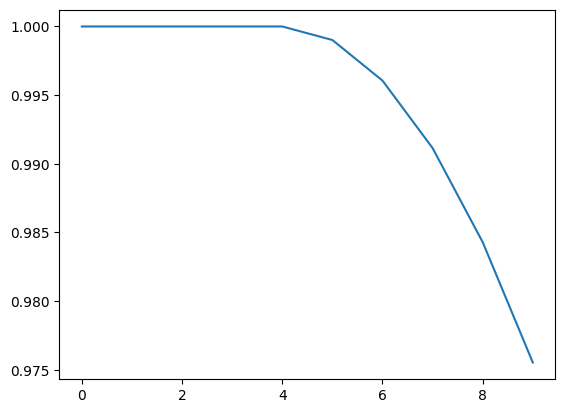

In [10]:
import matplotlib.pyplot as plt

plt.plot(test[Nx-w-5:Nx-w+5])
plt.show()

(513,) 1.996101364522417e-06
22.64950330581227
4.714676503859953e-31


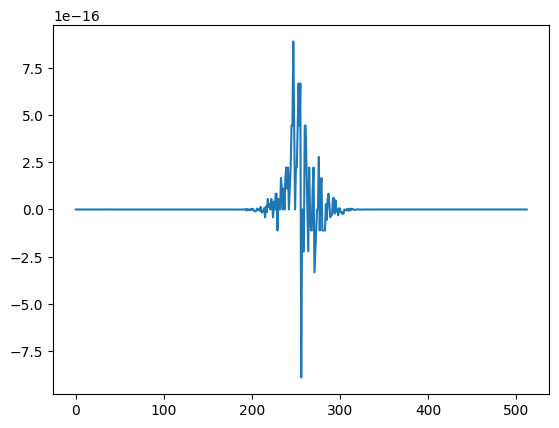

In [22]:
from beamprop_pkg.beamprop.utils import fft1c, ifft1c
from beamprop_pkg.beamprop.fields import gaussian_beam_1d
from beamprop_pkg.beamprop.grids import Grid1D

Nx = 513
dx = 2e-6
Lx = dx * (Nx - 1)

X, dx = Grid1D(Lx, Nx).arrays()

print(X.shape, dx)

E0 = gaussian_beam_1d(X, 60e-6, 0, 0.0)

print(sum(np.real(fft1c(E0))))
print(sum(np.imag(fft1c(E0))))

# plt.plot(np.abs(E0)**2)
# plt.plot(np.real(fft1c(E0)))
# plt.plot(np.imag(fft1c(E0)))
plt.plot(np.abs(E0)**2 - np.abs(ifft1c(fft1c(E0)))**2)
plt.show()